## ADS Assignment -3

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


### 2) Load the dataset into the tool.

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


### 3. Perform Below Visualizations.
 Univariate Analysis
 Bi-Variate Analysis
 Multi-Variate Analysis

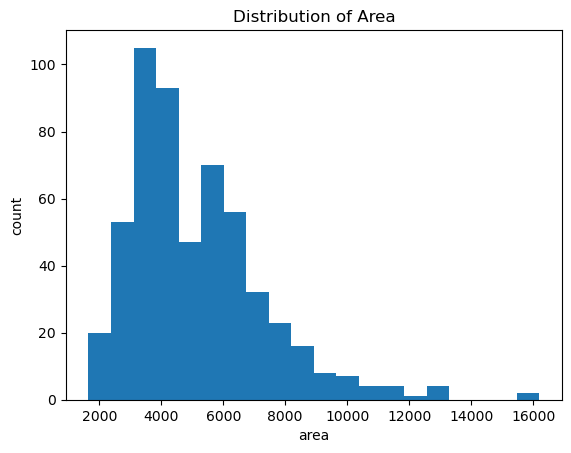

In [4]:
# Univariate analysis
plt.hist(data['area'], bins=20)
plt.xlabel('area')
plt.ylabel('count')
plt.title('Distribution of Area')
plt.show()

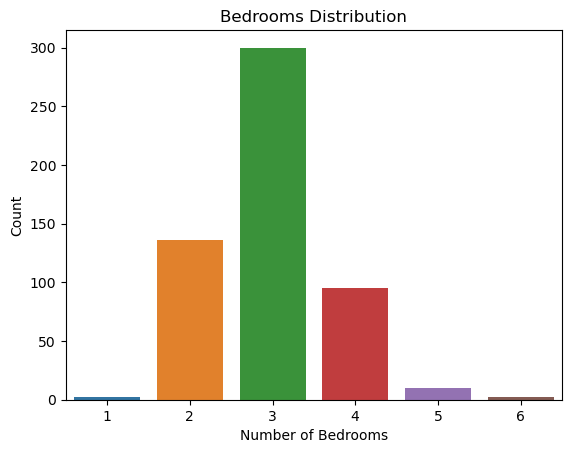

In [5]:
# Create a bar plot for the 'Bedrooms' variable
sns.countplot(data=data, x='bedrooms')
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

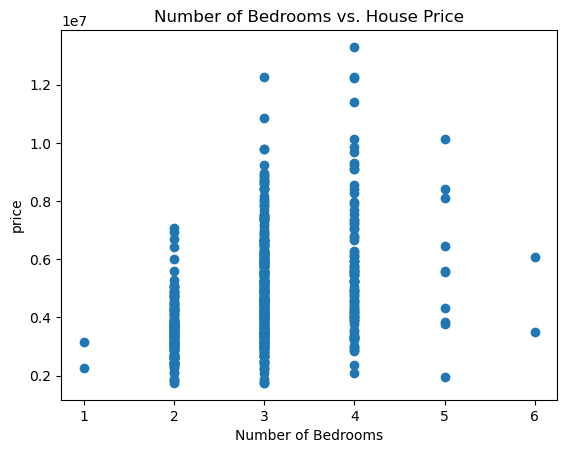

In [6]:
# Bi-Variate Analysis - Number of Bedrooms vs. House Price
plt.scatter(data['bedrooms'], data['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('price')
plt.title('Number of Bedrooms vs. House Price')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_3320\147526740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


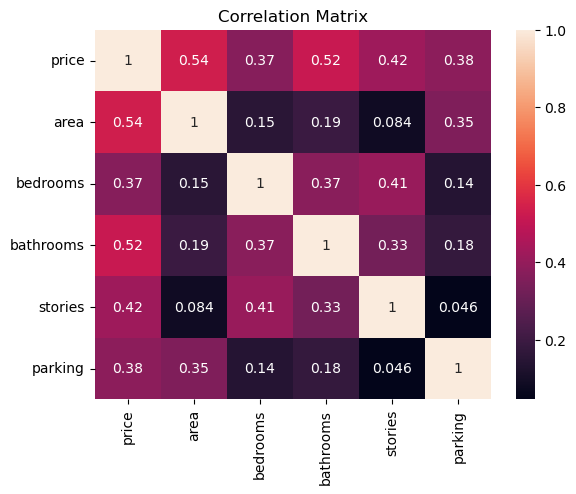

In [7]:
# Multi-Variate Analysis - Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


### 4)Perform descriptive statistics on the dataset.

In [8]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


### 5) Check for Missing values and deal with them

In [9]:
# Select only valid columns
valid_columns = data.select_dtypes(include=[np.number]).columns

# Fill missing values with mean of valid columns
data[valid_columns] = data[valid_columns].fillna(data[valid_columns].mean())


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [11]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


### 6) Find the outliers and replace them outliers

In [12]:
# Find outliers
# Choose the numerical columns for outlier detection
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate the z-score for each value in the column
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    
    # Set a threshold for identifying outliers (e.g., z-score > 3)
    threshold = 3
    
    # Replace outliers with the median value
    data[column]=np.where(z_scores >threshold, data[column].median(),data[column])

In [13]:
data.describe

<bound method NDFrame.describe of         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000  7420.0       4.0        2.0      3.0      yes        no   
1    12250000  8960.0       4.0        1.0      4.0      yes        no   
2    12250000  9960.0       3.0        2.0      2.0      yes        no   
3    12215000  7500.0       4.0        2.0      2.0      yes        no   
4    11410000  7420.0       4.0        1.0      2.0      yes       yes   
..        ...     ...       ...        ...      ...      ...       ...   
540   1820000  3000.0       2.0        1.0      1.0      yes        no   
541   1767150  2400.0       3.0        1.0      1.0       no        no   
542   1750000  3620.0       2.0        1.0      1.0      yes        no   
543   1750000  2910.0       3.0        1.0      1.0       no        no   
544   1750000  3850.0       3.0        1.0      2.0      yes        no   

    basement hotwaterheating airconditioning  parking furnishingstatus  
0   

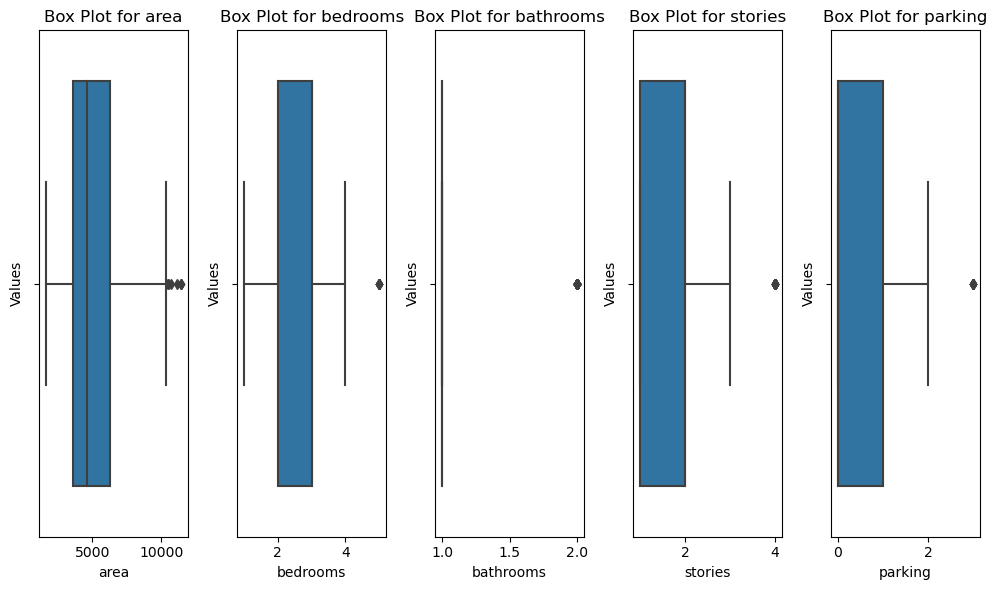

In [14]:
# Create box plots for each numerical column
plt.figure(figsize=(10, 6))

for col in numerical_columns:
    plt.subplot(1, len(numerical_columns), numerical_columns.index(col) + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

### 7) Check for Categorical columns and perform encoding.

In [15]:
# Identify categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Perform one-hot encoding
# Create a new DataFrame to store the encoded features
encoded_data = pd.get_dummies(data[categorical_cols], drop_first=True)

In [16]:
# Concatenate the encoded features with the original dataset
df_encoded = pd.concat([data, encoded_data], axis=1)

In [17]:
# Drop the original categorical columns
df_encoded.drop(categorical_cols, axis=1, inplace=True)

In [18]:
# Perform label encoding
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [19]:
# Encode each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Print the updated DataFrame
print(data)

        price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420.0       4.0        2.0      3.0         1          0   
1    12250000  8960.0       4.0        1.0      4.0         1          0   
2    12250000  9960.0       3.0        2.0      2.0         1          0   
3    12215000  7500.0       4.0        2.0      2.0         1          0   
4    11410000  7420.0       4.0        1.0      2.0         1          1   
..        ...     ...       ...        ...      ...       ...        ...   
540   1820000  3000.0       2.0        1.0      1.0         1          0   
541   1767150  2400.0       3.0        1.0      1.0         0          0   
542   1750000  3620.0       2.0        1.0      1.0         1          0   
543   1750000  2910.0       3.0        1.0      1.0         0          0   
544   1750000  3850.0       3.0        1.0      2.0         1          0   

     basement  hotwaterheating  airconditioning  parking  furnishingstatus  
0         

### 8) Split the data into dependent and independent variables.

In [20]:
# Split the data into X (features) and y (target variable)
X = data.drop('price', axis=1)
y = data['price']


In [21]:
# Print the independent variables
print('Independent Variables (features):')
print(X.head())

Independent Variables (features):
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420.0       4.0        2.0      3.0         1          0         0   
1  8960.0       4.0        1.0      4.0         1          0         0   
2  9960.0       3.0        2.0      2.0         1          0         1   
3  7500.0       4.0        2.0      2.0         1          0         1   
4  7420.0       4.0        1.0      2.0         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1      2.0                 0  
1                0                1      3.0                 0  
2                0                0      2.0                 1  
3                0                1      3.0                 0  
4                0                1      2.0                 0  


In [22]:
# Print the dependent variable
print('\nDependent Variable (target):')
print(y.head())


Dependent Variable (target):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


### 9) Scale the independent variables

In [23]:
from sklearn.preprocessing import StandardScaler

# Split into dependent and independent variables
X = data.drop('price', axis=1)  # Independent variables (features)
y = data['price']  # Dependent variable (target)

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled independent variables
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled independent variables
print(df_scaled.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.237672  1.464768   1.760041  1.378217  0.405623  -0.465315 -0.734539   
1  2.036247  1.464768  -0.568169  2.532024  0.405623  -0.465315 -0.734539   
2  2.554802  0.064244   1.760041  0.224410  0.405623  -0.465315  1.361397   
3  1.279156  1.464768   1.760041  0.224410  0.405623  -0.465315  1.361397   
4  1.237672  1.464768  -0.568169  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  furnishingstatus  
0        -0.219265         1.472618  1.517692         -1.406286  
1        -0.219265         1.472618  2.679409         -1.406286  
2        -0.219265        -0.679063  1.517692         -0.091662  
3        -0.219265         1.472618  2.679409         -1.406286  
4        -0.219265         1.472618  1.517692         -1.406286  


### 10) Split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
542,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,2
496,4000.0,2.0,1.0,1.0,1,0,0,0,0,0.0,2
484,3040.0,2.0,1.0,1.0,0,0,0,0,0,0.0,2
507,3600.0,2.0,1.0,1.0,1,0,0,0,0,0.0,2
252,9860.0,3.0,1.0,1.0,1,0,0,0,0,0.0,1


In [26]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
239,4000.0,3.0,1.0,2.0,1,0,0,0,0,1.0,0
113,9620.0,3.0,1.0,1.0,1,0,1,0,0,2.0,0
325,3460.0,4.0,1.0,2.0,1,0,0,0,1,0.0,1
66,4600.0,2.0,1.0,1.0,1,0,1,1,0,1.0,0
479,3660.0,4.0,1.0,2.0,0,0,0,0,0,0.0,2


In [27]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [28]:
y_train

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [29]:
# Print the shape of train and test sets
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Train set shape: (436, 11) (436,)
Test set shape: (109, 11) (109,)


### 11) Build the Model

In [30]:
#Model Building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### 12) Train the Model

In [31]:
#train the model
lr.fit(X_train,y_train)

LinearRegression()

### 13)Test the Model

In [32]:
# Test the model
y_pred=lr.predict(X_test)


In [33]:
y_pred

array([4222735.36743389, 6131800.6085261 , 4693651.24381131,
       5304057.3529988 , 3135007.94459908, 7252210.74468783,
       3496308.59403288, 3300128.70501456, 2891549.40710933,
       8756358.01981389, 6903276.27347099, 3971286.73685786,
       4020425.20939979, 5058106.86703856, 4335150.0912651 ,
       2072604.73605892, 4183305.32208407, 3901793.40873434,
       3391969.16311649, 4759499.06949301, 6267105.86348629,
       6680768.08308763, 4883108.67927183, 2816002.61869275,
       5087397.56423343, 5883192.15692349, 5114156.20570361,
       5780411.60549123, 3976129.6714394 , 5556211.37680062,
       3397727.99828245, 5671903.43892343, 7023017.14923359,
       3047469.70072992, 4557502.55777794, 5328075.50778647,
       5518032.4165659 , 3898169.5246291 , 2856192.02292806,
       4180379.55859496, 8343396.13901304, 5315580.28062956,
       6578905.46859092, 3946502.32748023, 3398858.41052001,
       6448045.48265365, 4857787.2589812 , 2807833.21361   ,
       4436062.63401569,

In [34]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [35]:
E=y_test-y_pred
E

239    3.622646e+05
113   -4.880061e+04
325   -6.861512e+05
66     1.625943e+06
479   -1.950079e+05
           ...     
76    -1.660220e+05
132    4.339609e+05
311   -2.086243e+05
464   -1.940755e+06
155   -3.980955e+05
Name: price, Length: 109, dtype: float64

### 14) Measure the performance using Metrics.

In [36]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.44725144558418906

In [37]:
#Predict with random Values
y_pr=lr.predict([[8960.0,4.0,1.0,4.0,1,0,0,0,1,3.0,0]])
y_pr

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8148418.85616391])

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 795547.6632674544
Mean Squared Error (MSE): 1167967789463.866
Root Mean Squared Error (RMSE): 1080725.5847179089
R-squared (R2): 0.5946692956515485


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [40]:
#training the model
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
#test the model
pred=rf.predict(X_test)

In [42]:
pred

array([4480000, 4193000, 4900000, 4900000, 2660000, 6650000, 4165000,
       2835000, 2100000, 7035000, 5250000, 2800000, 4515000, 5040000,
       5243000, 2520000, 3780000, 4060000, 3640000, 5250000, 3920000,
       6020000, 5740000, 2100000, 6510000, 6790000, 4193000, 3990000,
       4515000, 7875000, 3150000, 5810000, 9870000, 2100000, 3640000,
       4830000, 3570000, 3920000, 3675000, 4200000, 8080940, 2940000,
       5775000, 2870000, 3710000, 6650000, 2653000, 3423000, 4480000,
       5740000, 4403000, 5652500, 3640000, 3710000, 4830000, 4200000,
       6650000, 4403000, 3710000, 6510000, 6790000, 3920000, 4200000,
       7070000, 3220000, 2590000, 6300000, 2590000, 4235000, 4830000,
       3850000, 7210000, 4550000, 6083000, 4445000, 2961000, 2660000,
       3500000, 3353000, 3710000, 3850000, 5523000, 4893000, 4935000,
       3780000, 3010000, 4095000, 5425000, 5110000, 6475000, 4900000,
       4193000, 3675000, 3150000, 2100000, 7560000, 3640000, 5250000,
       3500000, 3500

In [43]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [46]:
print(accuracy)

0.009174311926605505


In [47]:
print(conmat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     1960000       0.00      0.00      0.00         1
     2100000       0.00      0.00      0.00         0
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         0
     2520000       0.00      0.00      0.00         0
     2590000       0.00      0.00      0.00         0
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         1
     2800000       0.00      0.00      0.00         0
     2835000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         0
     2940000       0.00      0.00      0.00         2
     2961000       0.00      0.00      0.00         0
     3010000       0.00      0.00      0.00         0
     3080000       0.00      0.00      0.00         2
     3129000       0.00    

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [49]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 2166039756730.2751
Root Mean Squared Error (RMSE): 1471747.1782647572
Mean Absolute Error (MAE): 1068596.880733945
R-squared (R²) Score: 0.24829911564149942


In [ ]:
# Conclusion: Classification Algorithms can't be applied since the target column is not catagorical, Better we can go with Regression Models

# While comparing with other Models, 'Linear Regression Model' gives better accuracy
